### Stage A Quiz Code

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading in the data
url='https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
fuel_data = pd.read_csv(url, error_bad_lines=False)
fuel_data.head()

C:\Users\user\Anaconda2\envs\py35\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [2]:
# find skewness in each row 
fuel_data.skew(axis = 1, skipna = True) 

0        2.645751
1        2.645751
2        2.645749
3        2.645750
4        2.632823
           ...   
29518    2.585605
29519    2.645718
29520    2.643757
29521    2.645533
29522    2.579144
Length: 29523, dtype: float64

### Dataset Description

This fuel quality data is from the Federal Energy Regulatory Commission


Dataset Description
'Record_id' : record id

'Utility_id_ferc1': Utility id assigned by the FERC

'Report_year': year of report

'Plant_name_ferc1': the name of the plant

'Fuel_type_code_pudl': the type of fuel

'Fuel_unit': the unit of fuel

'Fuel_qty_burned': the quantity of fuel burned

'Fuel_mmbtu_per_unit': the measure of energy per unit

'fuel_cost_per_unit_burned': the fuel cost per unit burned

'Fuel_cost_per_unit_delivered': the cost of fuel delivered per unit

'fuel_cost_per_mmbtu': the cost of fuel per mmbtu

In [3]:
#Create an identity matrix
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

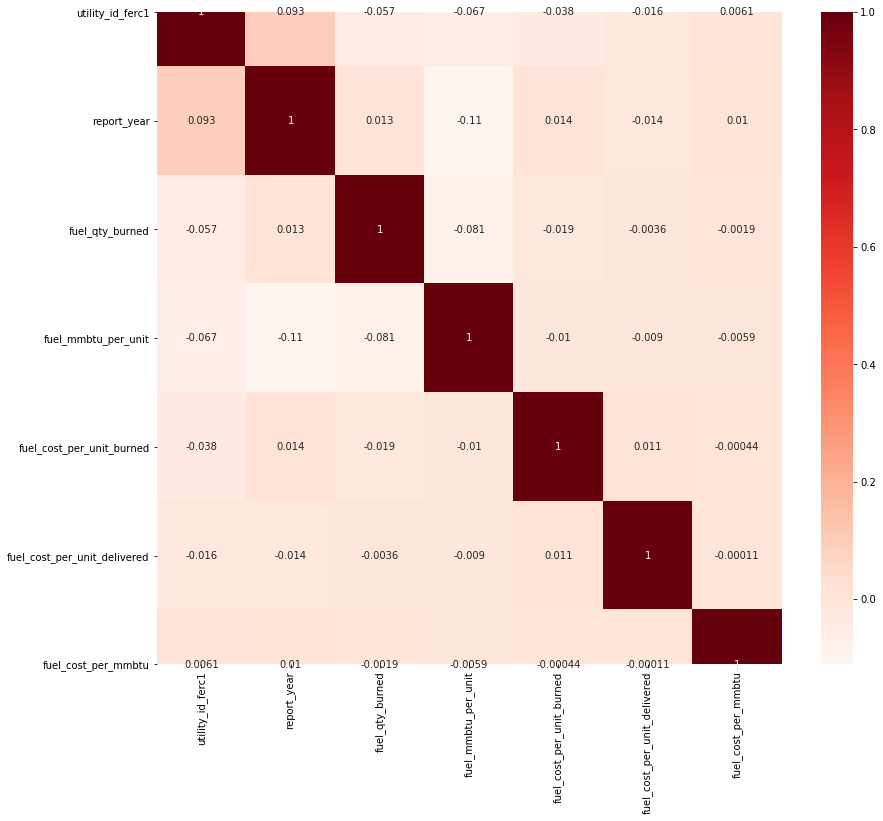

In [4]:
#Find correlation of features using Pearson Correlation

plt.figure(figsize=(14,12))
corr_plot = fuel_data.corr()
sns.heatmap(corr_plot, annot=True,  cmap=plt.cm.Reds)
plt.show()

From the plot above, the correlation of other features to the fuel_cost_per_unit_burned feature are as follows:

report_year 0.014
Fuel_cost_per_unit_delivered 0.011
Fuel_mmbtu_per_unit -0.01
Fuel_qty_burned -0.019
fuel_cost_per_mmbtu -0.00044
utility_id_ferc1 -0.038

with fuel_qty_burned and fuel_mmbtu_per_unit having the second and third lowest correlation with the Fuel Cost Per Unit Burned

In [5]:
fuel_data.groupby(['report_year', 'fuel_cost_per_unit_burned'])['fuel_cost_per_unit_burned'].count()

report_year  fuel_cost_per_unit_burned
1994         -57.490                       1
             -57.470                       1
             -57.450                       1
             -35.100                       1
              0.000                       20
                                          ..
2018          1287.907                     1
              3852.908                     1
              6952.161                     1
              38532.000                    1
              44738.780                    3
Name: fuel_cost_per_unit_burned, Length: 26881, dtype: int64

In [6]:
#Which year has the highest average fuel cost per unit delivered?
fuel_data.groupby('report_year')['fuel_cost_per_unit_delivered'].sum().sort_values(ascending=False)

report_year
1997    1.218738e+07
1996    1.000602e+07
2000    1.352903e+06
2009    7.975923e+05
2018    4.748057e+05
2015    3.569033e+05
1998    3.178799e+05
2014    2.256952e+05
2013    2.065968e+05
2004    1.663129e+05
2010    1.158381e+05
2016    1.074344e+05
2001    8.142834e+04
1994    7.859053e+04
2012    7.581617e+04
2011    7.412059e+04
2008    7.194631e+04
2003    6.740849e+04
2002    5.735121e+04
2007    5.476283e+04
2005    5.258506e+04
2006    4.805125e+04
2017    4.587348e+04
1995    3.931506e+04
1999    2.682921e+04
Name: fuel_cost_per_unit_delivered, dtype: float64

In [7]:
#What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [13]:
#Calculate skewness 0f fuel_cost_per_unit_burned

from scipy.stats import skew

data = fuel_data['fuel_cost_per_unit_burned']
round(skew(data),2)

19.79

In [9]:
#Calculate kurtosis 0f fuel_cost_per_unit_burned

from scipy.stats import kurtosis
data = fuel_data['fuel_cost_per_unit_burned']
round(kurtosis(data),2)

485.17

In [10]:
# Number of columns with missing values by percentage

total = fuel_data.isnull().sum().sort_values(ascending=False)
percent_1 = fuel_data.isnull().sum()/fuel_data.isnull().count()*100
percent_2 = (round(percent_1, 4)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
fuel_unit,180,0.6097
fuel_cost_per_mmbtu,0,0.0000
fuel_cost_per_unit_delivered,0,0.0000
fuel_cost_per_unit_burned,0,0.0000
fuel_mmbtu_per_unit,0,0.0000


In [11]:
#Which of the following fuel type code has the lowest average fuel cost per unit burned?

fuel_data.groupby(['fuel_type_code_pudl'])['fuel_cost_per_unit_burned'].count()


fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
waste        441
Name: fuel_cost_per_unit_burned, dtype: int64

In [12]:
A = [1,2,3,4,5,6] 
B = [13, 21, 34]
A.extend(B)
A

[1, 2, 3, 4, 5, 6, 13, 21, 34]